# Mark Goncharov B01-908

### 2.10.6.g

LU decomposition and Jacobi-algorithm

A
 [[10.    0.01  0.01 ...  0.01  0.01  0.01]
 [ 0.01 10.    0.01 ...  0.01  0.01  0.01]
 [ 0.01  0.01 10.   ...  0.01  0.01  0.01]
 ...
 [ 0.01  0.01  0.01 ... 10.    0.01  0.01]
 [ 0.01  0.01  0.01 ...  0.01 10.    0.01]
 [ 0.01  0.01  0.01 ...  0.01  0.01 10.  ]] 

f
 [100.  99.  98.  97.  96.  95.  94.  93.  92.  91.  90.  89.  88.  87.
  86.  85.  84.  83.  82.  81.  80.  79.  78.  77.  76.  75.  74.  73.
  72.  71.  70.  69.  68.  67.  66.  65.  64.  63.  62.  61.  60.  59.
  58.  57.  56.  55.  54.  53.  52.  51.  50.  49.  48.  47.  46.  45.
  44.  43.  42.  41.  40.  39.  38.  37.  36.  35.  34.  33.  32.  31.
  30.  29.  28.  27.  26.  25.  24.  23.  22.  21.  20.  19.  18.  17.
  16.  15.  14.  13.  12.  11.  10.   9.   8.   7.   6.   5.   4.   3.
   2.   1.] 

LU checking
 [[10.    0.01  0.01 ...  0.01  0.01  0.01]
 [ 0.01 10.    0.01 ...  0.01  0.01  0.01]
 [ 0.01  0.01 10.   ...  0.01  0.01  0.01]
 ...
 [ 0.01  0.01  0.01 ... 10.    0.01  0.01]
 [ 0.01  0.01  0.01 ...  0.

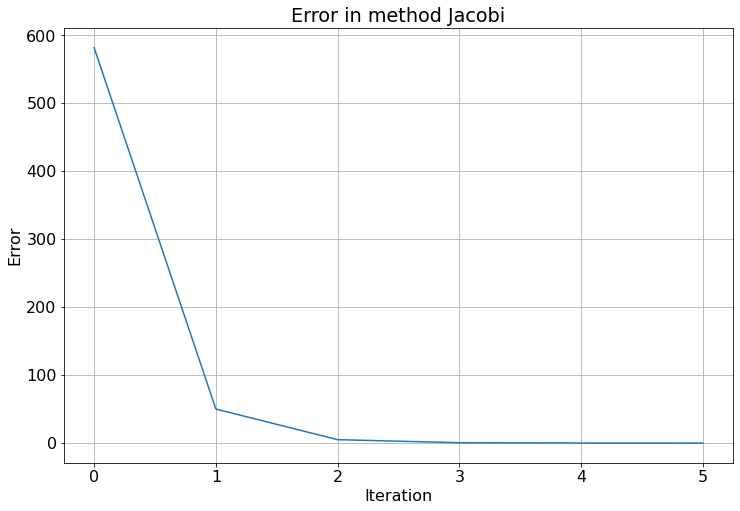

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

class LU_dec:

    # 1) Preparing LU matrix that consists of L and U
    
    def __init__(self, A): #A = np.matrix
        n = A.shape[0]
        if (n != A.shape[1]):
            print("A must be square!")
            return

        self.LU = np.matrix(np.zeros([n, n]))
        self.A = A
        
        for k in range(n):
            for j in range(k, n):
                # U-matrix
                self.LU[k, j] = A[k, j] - self.LU[k, :k] * self.LU[:k, j]
            for i in range(k + 1, n):
                # L-matrix
                self.LU[i, k] = (A[i, k] - self.LU[i, : k] * self.LU[: k, k]) / self.LU[k, k]

    # 2) L and U debug information about concrete matrixes
    
    def L(self):
        L = self.LU.copy()
        
        for i in range(L.shape[0]):
            L[i, i] = 1
            L[i, i+1 :] = 0
        return L

    def U(self):
        U = self.LU.copy()
        for i in range(1, U.shape[0]):
            U[i, :i] = 0
        return U

    # 3) Solving 2 linear equations
    
    def solve(self, f): # f - np.array
        if (f.size != self.LU.shape[0]):
            print("f must have the same size as matrix!")
            return

        n = f.size
        solution = f.copy()
        for i in range(1, n, 1):
            for j in range(0, i, 1):
                solution[i] = solution[i] - solution[j] * self.LU[i, j]

        for i in range(n - 1, -1, -1):
            for j in range(i + 1, n, 1):
                solution[i] -= solution[j] * self.LU[i, j]
            solution[i] /= self.LU[i, i]
        
        solution_nev = np.matrix(np.zeros(([n, 1])))
        f_nev = np.matrix(np.zeros(([n, 1])))
        for i in range(n):
            solution_nev[i, 0] = solution[i]
            f_nev[i, 0] = f[i]
        self.nev = np.linalg.norm(self.A * solution_nev - f_nev)
        return solution
    
    def get_nev(self):
        return self.nev

# 4) Checking for Jacobi-algorithm opportunity

def diag_dom(A):
    n = A.shape[0]
    if (n != A.shape[1]):
        print("A must be square!")
        return False

    for i in range(n):
        sum = 0
        for j in range(n):
            sum += np.abs(A[i, j])
        if (2 * np.abs(A[i, i]) <= sum):
            return False
    return True

class Jac:

    # 5) Preparing B and D matrixes

    def __init__(self, A):
        n = A.shape[0]
        if (n != A.shape[1]):
            print("A must be square!")
            return
        if (not diag_dom(A)):
            print("A must be diagonal predominance!")
            return
        
        self.D = np.matrix(np.zeros([n, n]))
        A_copy = A.copy()
        for i in range(n):
            self.D[i, i] = -1. / A[i, i]
            A_copy[i, i] = 0
        
        # Now A = L + U and D is diagonal 

        self.B = self.D * A_copy 
        self.A = A
    
    # 6) Making iterations

    def solve(self, f, err = 1.):
        if (f.size != self.B.shape[0]):
            print("f must have the same size as matrix!")
            return        
        
        n = f.size
        F = np.matrix(np.zeros([n, 1]))
        f_nev = np.matrix(np.zeros([n, 1]))
        for i in range (n):
            F[i, 0] =  -1. * f[i]
            f_nev[i, 0] = f[i]
        F = self.D * F
        sol = np.array(np.zeros([n, 1]))
        self.nev = np.array([np.linalg.norm(A @ sol - f_nev)])
        while (self.nev[-1] > err):
            sol = self.B * sol + F
            self.nev = np.append(self.nev, np.linalg.norm(self.A * sol - f_nev))
            
        out = np.array(np.zeros(n))
        for i in range(n):
            out[i] = sol[i, 0]
        return out
    
    # 7) print 'nevyaza'
    
    def get_nev(self):
        return self.nev


    
f = np.linspace(100, 1, 100)
A = np.matrix(np.zeros([100, 100]))
for i in range(100):
    for j in range(100):
        if (i == j):
            A[i, j] = 10
        else:
            A[i, j] = 0.01


LU = LU_dec(A)
Z = Jac(A)

#Checking for correct LU decomposition
print("A\n", A, "\n")
print("f\n", f, "\n")

print("LU checking\n", LU.L() * LU.U(), "\n")

sol1 = LU.solve(f)
sol2 = Z.solve(f, 0.01)

print("Solution LU: ", sol1)
print("\nError LU:", LU.get_nev())
print("\nSolution Jacobi: ", sol2)

mpl.rcParams['font.size'] = 16
plt.figure(figsize = (12, 8))
plt.plot(Z.get_nev())
plt.title("Error in method Jacobi")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.grid(b=True, which='major', axis='both')
plt.grid(b=True, which='minor', axis='both')